# 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import re

# 한글 폰트 설정
import matplotlib.font_manager as fm

font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'

font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 경고 문구 미표
import warnings
warnings.filterwarnings('ignore')

# YouTubeSearchTool 
- 유튜브 검색해서 URL 목록을 제공하는 도구
- 검색어: 키워드,개수

In [20]:
from langchain_community.tools import YouTubeSearchTool

tool = YouTubeSearchTool()

In [21]:
results = tool.run("코스트코 상품 리뷰,10")

In [22]:
# 문자열을 파이썬 리스트로 변환
import json
url_list = json.loads(results.replace("'", '"'))

# 결과 출력
print(url_list)

['https://www.youtube.com/watch?v=EXoJljoSxjY&pp=ygUa7L2U7Iqk7Yq47L2UIOyDge2SiCDrpqzrt7A%3D', 'https://www.youtube.com/watch?v=1RCfyEInSH0&pp=ygUa7L2U7Iqk7Yq47L2UIOyDge2SiCDrpqzrt7A%3D', 'https://www.youtube.com/watch?v=PNXft5OD3bA&pp=ygUa7L2U7Iqk7Yq47L2UIOyDge2SiCDrpqzrt7A%3D', 'https://www.youtube.com/watch?v=0LxUgZgDR9k&pp=ygUa7L2U7Iqk7Yq47L2UIOyDge2SiCDrpqzrt7A%3D', 'https://www.youtube.com/watch?v=Z-Lph_o0_MU&pp=ygUa7L2U7Iqk7Yq47L2UIOyDge2SiCDrpqzrt7A%3D', 'https://www.youtube.com/watch?v=78dBvzXwk1o&pp=ygUa7L2U7Iqk7Yq47L2UIOyDge2SiCDrpqzrt7A%3D', 'https://www.youtube.com/shorts/gC4XcZUB4ew', 'https://www.youtube.com/shorts/D-0JnRp47SM', 'https://www.youtube.com/watch?v=qDBXlv4W1J8&pp=ygUa7L2U7Iqk7Yq47L2UIOyDge2SiCDrpqzrt7A%3D', 'https://www.youtube.com/shorts/pEemiNJHmsU']


In [23]:
len(url_list)

10

In [24]:
url_list[0]

'https://www.youtube.com/watch?v=EXoJljoSxjY&pp=ygUa7L2U7Iqk7Yq47L2UIOyDge2SiCDrpqzrt7A%3D'

In [25]:
# 함수로 정의
def search_youtube(keyword, max_results=20):
    """
    유튜브에서 키워드 검색 결과를 가져오는 함수
    Args:
        keyword: 검색할 키워드
        max_results: 가져올 최대 결과 수
    Returns:
        url_list: 검색 결과의 URL 리스트
    """
    tool = YouTubeSearchTool()
    results = tool.run(f"{keyword},{max_results}")
    url_list = json.loads(results.replace("'", '"'))
    return url_list


# 함수 실행
url_list = search_youtube("코스트코 상품 리뷰")
len(url_list)

17

In [26]:
url_list2 = search_youtube("코스트코 상품 리뷰")
len(url_list2)

9

In [27]:
len(set(url_list) - set(url_list2))

9

# YoutubeLoader
- url을 입력하면 유튜브 자막을 추출하여 문서 객체로 변환
- add_video_info: 비디오 정보를 추가

In [28]:
from langchain_community.document_loaders import YoutubeLoader

# 자막을 포함한 동영상 정보를 가져오기
loader = YoutubeLoader.from_youtube_url(
    url_list[0], 
    add_video_info=True,
    language=["ko", "en"],
    translation="ko",
)

docs = loader.load()
print(len(docs))
print(docs[0])
print(docs[0].metadata)

1
page_content='코스트코 직원들도 못 구하는 코스트코 희귀템 탑 4 하정우 와인으로 유명한 와인이 있습니다 그래서 더 구하기 힘들어진 거 같은데요 바로 커클랜드 말보로 쇼미용 화이트 와인입니다 달콤한 편이 아니라 거의 드라이에 가까워요 과실향과 산미가 풍부하고 어떤 음식에도 잘 어울립니다 물에 닿아도 잘 찢어지지 않는 키친 타울 바로 커클랜드 키친 타올인쇄 한 장의 크기가 가로 28cm 새로 18cm 커다랗게 때문에 무려 한 장만으로도 프라이팬을 싹 닦을 수 있어요 코스트코 치즈케이크 애플파이 이건 너무 유명하잖아요 거기에 도해 하나만 더 추천드리면 생과일 타르트 한번 드셔 보세요 망고 자몽 키위 세 종류의 과일이 큼지막하게 올려져 있는데요 입안 가득한 식감 무조건 추천합니다 다이어트나 운동하시는 분들에게 필수 제품으로 소문난 커클랜드 프로틴 바입니다 맛도 좋지만 편의성이 좋아서 운동하시는 분들에게는 이만한게 없죠' metadata={'source': '6VNnEYbftbE', 'title': '입고되면 하루만에 품절되는 코스트코 추천템 TOP4! 코스트코 가서 눈에 보이면 바로 구매하셔야 합니다!', 'description': 'Unknown', 'view_count': 293256, 'thumbnail_url': 'https://i.ytimg.com/vi/6VNnEYbftbE/hq720.jpg?sqp=-oaymwEoCIAKENAF8quKqQMcGADwAQH4AbYIgAKAD4oCDAgAEAEYRCBlKGIwDw==&rs=AOn4CLDYDMZ1_EiGm5YT6QH_PQ36Dyc8Cg', 'publish_date': '2024-06-18 00:00:00', 'length': 52, 'author': '살림연구소 오클'}
{'source': '6VNnEYbftbE', 'title': '입고되면 하루만에 품절되는 코스트코 추천템 TOP4! 코스트코 가서 눈에 보이면 바로 구매하셔야 합니다!', 'description': 'Unknown', 'view_

In [29]:
# 함수를 정의
def get_youtube_video_transcript(url):
    """
    YouTube 동영상의 자막을 가져오는 함수
    Args:
        url (str): YouTube 동영상 URL
    Returns:
        Document: 동영상 자막 정보 객체
    """
    loader = YoutubeLoader.from_youtube_url(
        url,
        add_video_info=True,
        language=["ko", "en"],
        translation="ko",
    )

    docs = loader.load()
    return docs

# 함수 실행
docs = get_youtube_video_transcript(url_list[0])
print(len(docs))
print(docs[0])

1
page_content='코스트코 직원들도 못 구하는 코스트코 희귀템 탑 4 하정우 와인으로 유명한 와인이 있습니다 그래서 더 구하기 힘들어진 거 같은데요 바로 커클랜드 말보로 쇼미용 화이트 와인입니다 달콤한 편이 아니라 거의 드라이에 가까워요 과실향과 산미가 풍부하고 어떤 음식에도 잘 어울립니다 물에 닿아도 잘 찢어지지 않는 키친 타울 바로 커클랜드 키친 타올인쇄 한 장의 크기가 가로 28cm 새로 18cm 커다랗게 때문에 무려 한 장만으로도 프라이팬을 싹 닦을 수 있어요 코스트코 치즈케이크 애플파이 이건 너무 유명하잖아요 거기에 도해 하나만 더 추천드리면 생과일 타르트 한번 드셔 보세요 망고 자몽 키위 세 종류의 과일이 큼지막하게 올려져 있는데요 입안 가득한 식감 무조건 추천합니다 다이어트나 운동하시는 분들에게 필수 제품으로 소문난 커클랜드 프로틴 바입니다 맛도 좋지만 편의성이 좋아서 운동하시는 분들에게는 이만한게 없죠' metadata={'source': '6VNnEYbftbE', 'title': '입고되면 하루만에 품절되는 코스트코 추천템 TOP4! 코스트코 가서 눈에 보이면 바로 구매하셔야 합니다!', 'description': 'Unknown', 'view_count': 293272, 'thumbnail_url': 'https://i.ytimg.com/vi/6VNnEYbftbE/hq720.jpg?sqp=-oaymwEoCIAKENAF8quKqQMcGADwAQH4AbYIgAKAD4oCDAgAEAEYRCBlKGIwDw==&rs=AOn4CLDYDMZ1_EiGm5YT6QH_PQ36Dyc8Cg', 'publish_date': '2024-06-18 00:00:00', 'length': 52, 'author': '살림연구소 오클'}


# create_extraction_chain 활용하여 요약, 추출

In [65]:
import os
from dotenv import load_dotenv

load_dotenv()

OPENAI_API_KEY = os.environ["OPENAI_API_KEY"]

In [31]:
docs[0]

Document(page_content='코스트코 직원들도 못 구하는 코스트코 희귀템 탑 4 하정우 와인으로 유명한 와인이 있습니다 그래서 더 구하기 힘들어진 거 같은데요 바로 커클랜드 말보로 쇼미용 화이트 와인입니다 달콤한 편이 아니라 거의 드라이에 가까워요 과실향과 산미가 풍부하고 어떤 음식에도 잘 어울립니다 물에 닿아도 잘 찢어지지 않는 키친 타울 바로 커클랜드 키친 타올인쇄 한 장의 크기가 가로 28cm 새로 18cm 커다랗게 때문에 무려 한 장만으로도 프라이팬을 싹 닦을 수 있어요 코스트코 치즈케이크 애플파이 이건 너무 유명하잖아요 거기에 도해 하나만 더 추천드리면 생과일 타르트 한번 드셔 보세요 망고 자몽 키위 세 종류의 과일이 큼지막하게 올려져 있는데요 입안 가득한 식감 무조건 추천합니다 다이어트나 운동하시는 분들에게 필수 제품으로 소문난 커클랜드 프로틴 바입니다 맛도 좋지만 편의성이 좋아서 운동하시는 분들에게는 이만한게 없죠', metadata={'source': '6VNnEYbftbE', 'title': '입고되면 하루만에 품절되는 코스트코 추천템 TOP4! 코스트코 가서 눈에 보이면 바로 구매하셔야 합니다!', 'description': 'Unknown', 'view_count': 293272, 'thumbnail_url': 'https://i.ytimg.com/vi/6VNnEYbftbE/hq720.jpg?sqp=-oaymwEoCIAKENAF8quKqQMcGADwAQH4AbYIgAKAD4oCDAgAEAEYRCBlKGIwDw==&rs=AOn4CLDYDMZ1_EiGm5YT6QH_PQ36Dyc8Cg', 'publish_date': '2024-06-18 00:00:00', 'length': 52, 'author': '살림연구소 오클'})

In [32]:
from langchain.chains import create_extraction_chain
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate

# 스키마 정의
schema = {
    "properties": {
        "상품_이름": {"type": "string"},
        "상품_설명": {"type": "string"},
        "상품_가격": {"type": "string"},
        "상품_평가": {"type": "string"},
    },
    "required": ["상품_이름", "상품_설명", "상품_가격", "상품_평가"],
}


# Chain 생성
prompt_template = """Extract and save the relevant entities mentioned \
in the following passage together with their properties. 
Only extract the properties mentioned in the 'information_extraction' function. \
When no suitable data is present, show the default value 'N/A'.

Passage:
{input}
""" 

prompt = ChatPromptTemplate.from_template(prompt_template)
llm = ChatOpenAI(temperature=0, model_name="gpt-3.5-turbo-0125", api_key=OPENAI_API_KEY)
chain = create_extraction_chain(schema=schema, llm=llm, prompt=prompt)

# Chain 실행
response = chain.invoke(docs[0])

# 결과 확인
response

{'input': Document(page_content='코스트코 직원들도 못 구하는 코스트코 희귀템 탑 4 하정우 와인으로 유명한 와인이 있습니다 그래서 더 구하기 힘들어진 거 같은데요 바로 커클랜드 말보로 쇼미용 화이트 와인입니다 달콤한 편이 아니라 거의 드라이에 가까워요 과실향과 산미가 풍부하고 어떤 음식에도 잘 어울립니다 물에 닿아도 잘 찢어지지 않는 키친 타울 바로 커클랜드 키친 타올인쇄 한 장의 크기가 가로 28cm 새로 18cm 커다랗게 때문에 무려 한 장만으로도 프라이팬을 싹 닦을 수 있어요 코스트코 치즈케이크 애플파이 이건 너무 유명하잖아요 거기에 도해 하나만 더 추천드리면 생과일 타르트 한번 드셔 보세요 망고 자몽 키위 세 종류의 과일이 큼지막하게 올려져 있는데요 입안 가득한 식감 무조건 추천합니다 다이어트나 운동하시는 분들에게 필수 제품으로 소문난 커클랜드 프로틴 바입니다 맛도 좋지만 편의성이 좋아서 운동하시는 분들에게는 이만한게 없죠', metadata={'source': '6VNnEYbftbE', 'title': '입고되면 하루만에 품절되는 코스트코 추천템 TOP4! 코스트코 가서 눈에 보이면 바로 구매하셔야 합니다!', 'description': 'Unknown', 'view_count': 293272, 'thumbnail_url': 'https://i.ytimg.com/vi/6VNnEYbftbE/hq720.jpg?sqp=-oaymwEoCIAKENAF8quKqQMcGADwAQH4AbYIgAKAD4oCDAgAEAEYRCBlKGIwDw==&rs=AOn4CLDYDMZ1_EiGm5YT6QH_PQ36Dyc8Cg', 'publish_date': '2024-06-18 00:00:00', 'length': 52, 'author': '살림연구소 오클'}),
 'text': [{'상품_이름': '커클랜드 말보로 쇼미용 화이트 와인',
   '상품_설명': '달콤한 편이 아니라 거의 드라이에 가까워요 과실향과 산미가 풍부하고 어떤 음식에도 잘 어울립니다

In [33]:
# 결과를 판다스 데이터프레임으로 변환
df = pd.DataFrame(response['text'])
df.head()

,상품_이름,상품_설명,상품_가격,상품_평가
0,커클랜드 말보로 쇼미용 화이트 와인,달콤한 편이 아니라 거의 드라이에 가까워요 과실향과 산미가 풍부하고 어떤 음식에도 ...,N/A,N/A
1,커클랜드 키친 타올,한 장의 크기가 가로 28cm 새로 18cm 커다랗게 때문에 무려 한 장만으로도 프...,N/A,N/A
2,코스트코 치즈케이크,N/A,N/A,N/A
3,생과일 타르트,망고 자몽 키위 세 종류의 과일이 큼지막하게 올려져 있는데요 입안 가득한 식감 무조...,N/A,N/A
4,커클랜드 프로틴 바,맛도 좋지만 편의성이 좋아서 운동하시는 분들에게는 이만한게 없죠,N/A,N/A


In [34]:
# 전체 동영상에 대해 자막을 추출하고 엔티티를 추출
def extract_entities_from_youtube_videos(url_list):
    """
    YouTube 동영상의 자막을 가져와 엔티티를 추출하는 함수
    Args:
        url_list (list): YouTube 동영상 URL 리스트
    Returns:
        pd.DataFrame: 엔티티 추출 결과
    """
    # 스키마 정의
    schema = {
        "properties": {
            "상품_이름": {"type": "string"},
            "상품_설명": {"type": "string"},
            "상품_가격": {"type": "string"},
            "상품_평가": {"type": "string"},
        },
        "required": ["상품_이름", "상품_설명", "상품_가격", "상품_평가"],
    }

    # Chain 생성
    prompt_template = """Extract and save the relevant entities mentioned \
    in the following passage together with their properties. 
    Only extract the properties mentioned in the 'information_extraction' function. \
    When no suitable data is present, show the default value 'N/A'.

    Passage:
    {input}
    """ 

    prompt = ChatPromptTemplate.from_template(prompt_template)
    llm = ChatOpenAI(temperature=0, model_name="gpt-3.5-turbo-0125", api_key=OPENAI_API_KEY)
    chain = create_extraction_chain(schema=schema, llm=llm, prompt=prompt)

    # 결과를 저장할 데이터프레임 생성
    df = pd.DataFrame()

    for url in url_list:
        # 동영상 자막 가져오기
        docs = get_youtube_video_transcript(url)

        # Chain 실행
        response = chain.invoke(docs[0])

        # 결과를 데이터프레임으로 변환
        df = pd.concat([df, pd.DataFrame(response['text'])])

    return df

In [35]:
df = extract_entities_from_youtube_videos(url_list[:2])
df

,상품_이름,상품_설명,상품_가격,상품_평가
0,커클랜드 말보로 쇼미용 화이트 와인,달콤한 편이 아니라 거의 드라이에 가까워요 과실향과 산미가 풍부하고 어떤 음식에도 ...,N/A,N/A
1,커클랜드 키친 타월,한 장의 크기가 가로 28cm 새로 18cm 커다랗게 때문에 무려 한 장만으로도 프...,N/A,N/A
2,코스트코 치즈케이크,N/A,N/A,N/A
3,생과일 타르트,망고 자몽 키위 세 종류의 과일이 큼지막하게 올려져 있는데요 입안 가득한 식감 무조...,N/A,N/A
4,커클랜드 프로틴 바,맛도 좋지만 편의성이 좋아서 운동하시는 분들에게는 이만한게 없죠,N/A,N/A
0,이탈리아 무디 파사타 토마토 퓨리,이탈리아의 햇살에 빨갛 익은 토마토를 지중해의 111년만으로 만든 벨벳 재질의 퓨레,"1,990",N/A
1,메일 바이오 프로틴 요거트 플레인,lgg 유산균 요건 크리스찬 한센 유산균으로 커클랜드 유산균 제조 업체 세계 1위 ...,"1,490",N/A
2,고디바 브라운,한 박스에 16개 18개가 들어 있으며 다크와 밀크 두 가지 맛이 있습니다,"18,990",N/A
3,포크 베이크,고기와 치즈가 50% 증량된 제품으로 28cm 크기이며 쫄깃하고 맛있는 맛,"5,900",N/A


# 유튜브 동영상 댓글 분석
삼성 SDS 채널 구독 이벤트   
https://www.youtube.com/watch?v=j_EciRV3V1k&t=15s

## 댓글 데이터 크롤링으로 수집

In [1]:
# 삼성 SDS 채널 구독 이벤트 

url = "https://www.youtube.com/watch?v=j_EciRV3V1k&t=15s"

In [3]:
# Seleium 드라이버 생성
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

from bs4 import BeautifulSoup
import time
import random

# # Chrome 옵션 설정
# options = webdriver.ChromeOptions()
# # options.add_argument('--headless')  

# # 드라이버 서비스 생성
# service = Service(ChromeDriverManager().install())

# # 웹 드라이버 초기화
# driver = webdriver.Chrome(service=service, options=options)


### mac에 맞게 변경 ###
# Chrome 옵션 설정

options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Selenium Manager를 사용하여 자동으로 드라이버 관리
service = Service()

# 웹 드라이버 초기화
driver = webdriver.Chrome(service=service, options=options)

#####################



# 윈도우 크기 설정
driver.set_window_size(800, 600)

# URL 접속하여 실행
driver.implicitly_wait(5)
driver.get(url)

# 팝업의 '아니요' 버튼을 클릭하여 닫기
try:
    dismiss_button = driver.find_element(By.CSS_SELECTOR, "#dismiss-button button")
    dismiss_button.click()
except:
    pass 

In [4]:
# 현재 페이지 높이
current_page_height = driver.execute_script("return document.documentElement.scrollHeight") 
print(current_page_height)


# 스크롤 다운
while current_page_height < 100000: 
    
    driver.execute_script(f"window.scrollTo({current_page_height}, {current_page_height + 10000});") 
    time.sleep(random.randint(1, 4))
    body = driver.find_element(By.CSS_SELECTOR, 'body')
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(random.randint(1, 4))
    
    scrolled_page_height = driver.execute_script("return document.documentElement.scrollHeight")  
    if scrolled_page_height == current_page_height: 
        break
    current_page_height = driver.execute_script("return document.documentElement.scrollHeight")     


5822


In [5]:
# HTML 소스 파싱 
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
soup.find(name="div", attrs={"id":"contents"})

# 댓글 요소를 찾기
### inspect > find "content" > copy selector > #contents > ytd-comments
reviews = soup.find_all(name='ytd-comment-thread-renderer', attrs={'class':'style-scope ytd-item-section-renderer'})

print(len(reviews))
print(reviews[2])

445
<ytd-comment-thread-renderer class="style-scope ytd-item-section-renderer"><!--css-build:shady--><!--css-build:shady--><dom-if class="style-scope ytd-comment-thread-renderer"><template is="dom-if"></template></dom-if>
<ytd-comment-view-model class="style-scope ytd-comment-thread-renderer" id="comment" style="--ytd-comment-paid-background-color: initial;"><!--css-build:shady--><!--css-build:shady--><div class="style-scope ytd-comment-view-model" id="paid-comment-background"></div>
<div class="style-scope ytd-comment-view-model" id="linked-comment-badge"></div>
<div class="style-scope ytd-comment-view-model" id="body">
<div class="style-scope ytd-comment-view-model" id="author-thumbnail">
<a aria-label="@fornest-3" class="yt-simple-endpoint style-scope ytd-comment-view-model" href="/@fornest-3" role="button">
<yt-img-shadow class="style-scope ytd-comment-view-model no-transition" fit="" height="40" loaded="" style="background-color: transparent;" width="40"><!--css-build:shady--><!--

In [6]:
### 사용자 이름
#author-text > span
reviews[2].select("#author-text > span")[0].text.strip()

'@fornest-3'

In [7]:
### 댓글 텍스트
#content-text
reviews[2].select("#content-text")[0].text

'삼성SDS의 지금까지 집약한 AI 기술과 고객 업종에 대한 깊은 이해를 바탕으로 기업 업무의 Hyperautomation을 현실로 실현하는 다양한 생성형 AI 서비스에 전 세계인의 사랑과 무궁한 번영이 함께 하시길 두손 모아 기원합니다^^'

In [8]:
### 날짜
#published-time-text
reviews[2].select("#published-time-text")[0].text.strip()

'7개월 전'

In [9]:
### 리뷰 정보(이름, 댓글, 날짜)를 추출하는 함수 정의
def get_review_info(review):
    """
    댓글 요소에서 사용자 이름, 댓글, 날짜를 추출하는 함수
    Args:
        review: 댓글 요소
    Returns:
        dict: 사용자 이름, 댓글, 날짜 정보를 담은 딕셔너리
    """
    author = review.select("#author-text > span")[0].text.strip()
    comment = review.select("#content-text")[0].text
    date = review.select("#published-time-text")[0].text.strip()
    return {"author": author, "comment": comment, "date": date}


# 리뷰 정보 추출
review_info = get_review_info(reviews[2])
print(review_info)

{'author': '@fornest-3', 'comment': '삼성SDS의 지금까지 집약한 AI 기술과 고객 업종에 대한 깊은 이해를 바탕으로 기업 업무의 Hyperautomation을 현실로 실현하는 다양한 생성형 AI 서비스에 전 세계인의 사랑과 무궁한 번영이 함께 하시길 두손 모아 기원합니다^^', 'date': '7개월 전'}


In [10]:
### 크롬 기본 language 한글 확인

from datetime import datetime
from dateutil.relativedelta import relativedelta

def convert_time_strings(time_str, current_time=None):
    """
    시간 문자열을 datetime 객체로 변환하는 함수
    Args:
        time_str: 시간 문자열
        current_time: 기준 시간
    Returns:
        datetime: 변환된 datetime 객체
    """
    if current_time is None:
        current_time = datetime.now()

    time_str = time_str.replace(" ", "").strip()

    if "분전" in time_str:
        minutes = time_str.replace("분전", "")
        minutes = re.sub("[^0-9]", "", minutes)
        minutes = int(minutes)
        return (current_time - relativedelta(minutes=minutes)).strftime("%Y-%m-%d %H:%M:%S")
        
    elif "시간전" in time_str:
        hours = time_str.replace("시간전", "")
        hours = re.sub("[^0-9]", "", hours)
        hours = int(hours)
        return (current_time - relativedelta(hours=hours)).strftime("%Y-%m-%d %H:%M:%S")
    
    elif "일전" in time_str:
        days = time_str.replace("일전", "")
        days = re.sub("[^0-9]", "", days)
        days = int(days)
        return (current_time - relativedelta(days=days)).strftime("%Y-%m-%d %H:%M:%S")
    elif "주전" in time_str:
        weeks = time_str.replace("주전", "")
        weeks = re.sub("[^0-9]", "", weeks)
        weeks = int(weeks)
        return (current_time - relativedelta(weeks=weeks)).strftime("%Y-%m-%d %H:%M:%S")
    elif "개월전" in time_str:
        months = time_str.replace("개월전", "")
        months = re.sub("[^0-9]", "", months)
        months = int(months)
        return (current_time - relativedelta(months=months)).strftime("%Y-%m-%d %H:%M:%S")
    elif "년전" in time_str:
        years = time_str.replace("년전", "")
        years = re.sub("[^0-9]", "", years)
        years = int(years)
        return (current_time - relativedelta(years=years)).strftime("%Y-%m-%d %H:%M:%S")
    else:
        try:
            time_str = (time_str).strftime("%Y-%m-%d %H:%M:%S")
        except:
            time_str = np.nan
        return time_str
    
# 시간 문자열 변환
time_str = "7개월 전"
converted_time = convert_time_strings(time_str)
print(converted_time)

2024-01-30 15:15:10


In [11]:

### 리뷰 정보(이름, 댓글, 좋아요, 날짜)를 추출하는 함수 정의
def get_review_info(review):
    """
    댓글 요소에서 사용자 이름, 댓글, 날짜를 추출하는 함수
    Args:
        review: 댓글 요소
    Returns:
        dict: 사용자 이름, 댓글, 날짜 정보를 담은 딕셔너리
    """
    author = review.select("#author-text > span")[0].text.strip()
    comment = review.select("#content-text")[0].text
    date = review.select("#published-time-text")[0].text.strip()
    try:
        date = convert_time_strings(date)
    except:
        pass
    return {"author": author, "comment": comment, "date": date}


# 리뷰 정보 추출
review_info = get_review_info(reviews[2])
print(review_info)

{'author': '@fornest-3', 'comment': '삼성SDS의 지금까지 집약한 AI 기술과 고객 업종에 대한 깊은 이해를 바탕으로 기업 업무의 Hyperautomation을 현실로 실현하는 다양한 생성형 AI 서비스에 전 세계인의 사랑과 무궁한 번영이 함께 하시길 두손 모아 기원합니다^^', 'date': '2024-01-30 15:15:13'}


In [16]:
### 한 페이지의 모든 리뷰를 반복문으로 추출하는 함수 정의

def get_youtube_reviews(url):
    """
    한 페이지의 모든 리뷰를 추출하는 함수
    Args:
        url: YouTube 동영상 URL
    Returns:
        list: 리뷰 정보 딕셔너리를 담은 리스트
    """
    # # driver 설정
    # options = webdriver.ChromeOptions()
    # options.add_argument('--headless')
    # service = Service(ChromeDriverManager().install())
    # driver = webdriver.Chrome(service=service, options=options)
    # driver.set_window_size(800, 600)
    # driver.get(url)
    # driver.implicitly_wait(5)
    # time.sleep(5)

    ### mac에 맞게 변경 ###

    # 네, Mac 사용자를 위한 설정은 조금 다릅니다. 
    # Mac에서 Selenium을 사용할 때는 ChromeDriver를 별도로 설치할 필요가 없습니다. 
    # 대신 Selenium Manager를 사용하여 자동으로 드라이버를 관리할 수 있습니다. 

    # driver 설정
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    # options.add_argument('--lang=ko-KR')  # 언어를 한국어로 설정 -> 왠지 잘 안됨


    # 언어 설정을 위한 prefs 딕셔너리
    prefs = {
        "translate_whitelists": {"ko":"en"},
        "intl.accept_languages": "ko,ko_KR"
    }
    options.add_experimental_option("prefs", prefs)

    service = Service()
    driver = webdriver.Chrome(service=service, options=options)
    driver.set_window_size(800, 600)
    driver.get(url)
    driver.implicitly_wait(5)
    time.sleep(5)

    #####################



    # 팝업 닫기
    try:
        dismiss_button = driver.find_element(By.CSS_SELECTOR, "#dismiss-button button")
        dismiss_button.click()
    except:
        pass

    driver.implicitly_wait(5)
    time.sleep(5)
   
    current_page_height = driver.execute_script("return document.documentElement.scrollHeight") 
    while current_page_height < 100000: 
        driver.execute_script(f"window.scrollTo({current_page_height}, {current_page_height + 10000});") 
        time.sleep(random.randint(1, 4))
        body = driver.find_element(By.CSS_SELECTOR, 'body')
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(random.randint(1, 4))
        scrolled_page_height = driver.execute_script("return document.documentElement.scrollHeight")  
        if scrolled_page_height == current_page_height: 
            break
        current_page_height = driver.execute_script("return document.documentElement.scrollHeight")  

    # HTML 추출하고 driver 닫기
    driver.implicitly_wait(5)
    html = driver.page_source
    driver.close()
    
    # HTML 파싱
    soup = BeautifulSoup(html, 'html.parser')
    reviews = soup.find_all(name='ytd-comment-thread-renderer', attrs={'class':'style-scope ytd-item-section-renderer'})
    review_list = []
    for review in reviews:
        review_info = get_review_info(review)
        review_list.append(review_info)
    return review_list


# 함수 실행
reviews = get_youtube_reviews(url)
print(len(reviews))
print(reviews[0])

445
{'author': '@SAMSUNGSDS', 'comment': " 채널 구독 EVENT \r\n\r\nAI의 능력을 모두의 능력으로 만드는 기업 하이퍼오토메이션 엑셀레이터 \r\n\r\n삼성SDS ' AI시대 오피스&라이프'  (https://youtu.be/j_EciRV3V1k) \r\n\r\n영상 시청과 함께 유튜브 채널 구독하고 소문내주세요 \n추첨을 통해  갤럭시탭 S9 FE, 갤럭시 워치 6 등 다양한 선물을 드립니다. \r\n\r\n\r\n이벤트 기간\r\n\r\n참여 기간 : 2024년  01월 29일 (월) ~ 2024년 02월 29일 (금)\r\n당첨자 발표 : 2024년 03월 15일 (금) 개별 연락\nSTEP 1.  AI시대 오피스&라이프 브랜드 필름 시청하기 (https://youtu.be/j_EciRV3V1k)\r\nSTEP 2. 삼성SDS  유튜브 채널 구독하고  소문내기\r\nSTEP 3. 구독 화면을 캡쳐해 아래  링크로 제출하면 완료!\r\n\r\n\r\n 이벤트 참여 링크 : https://naver.me/5K54zUuQ\r\n채널 구독하고 캡처한 이미지 제출 완료 시 참여로 인정됩니다.\n추첨 선물 \r\n 갤럭시탭 S9 FE / Wi-Fi, 128GB (1명)\r\n 갤럭시 워치 6 / 44mm, Bluetooth (2명)\r\n 도미노피자+콜라 기프티콘(10명) \r\n 스타벅스 카페 아메리카노 T 기프티콘(100명)", 'date': '2024-01-30 15:35:36'}


In [17]:
# 판다스 데이터프레임으로 변환
df = pd.DataFrame(reviews)
df.head()

,author,comment,date
0,@SAMSUNGSDS,채널 구독 EVENT \r\n\r\nAI의 능력을 모두의 능력으로 만드는 기업 하...,2024-01-30 15:35:36
1,@user-pw3gk2vn5e,삼성SDS의 생성형 AI 서비스가 오피스와 우리의 라이프에 어떤 새바람을 일으킬지\...,2024-02-29 15:35:36
2,@fornest-3,삼성SDS의 지금까지 집약한 AI 기술과 고객 업종에 대한 깊은 이해를 바탕으로 기...,2024-01-30 15:35:36
3,@user-li3hn3lw6q,AI의 능력을 모두의 능력으로 만드는 기업 하이퍼오토메이션 엑셀레이터 \r\n삼성S...,2024-02-29 15:35:36
4,@user-bz9fd3rw1k,삼성SDS만의 생성형 AI 서비스가 너무나 기대되고 AI 시대를 선도할 앞으로의 \...,2024-02-29 15:35:36


In [18]:
# 수집한 데이터를 저장
df.to_csv("youtube_reviews.csv", index=False)

In [19]:
# 저장해둔 데이터를 불러오는 코드
df = pd.read_csv("youtube_reviews.csv")

In [20]:
pd.to_datetime(df['date']).describe()

count                              445
mean     2024-02-23 04:06:20.494382336
min                2024-01-30 15:35:36
25%                2024-01-30 15:35:36
50%                2024-02-29 15:35:36
75%                2024-02-29 15:35:36
max                2024-08-09 15:35:36
Name: date, dtype: object

## 시간에 따른 리뷰 수의 변화를 그래프로 시각화

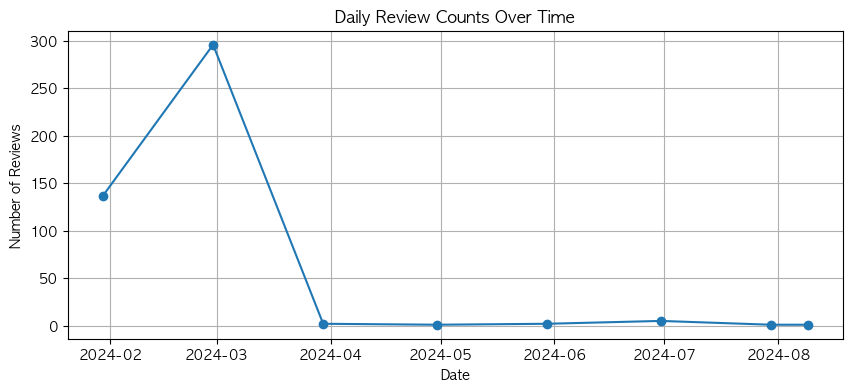

In [21]:
# 날짜 데이터를 datetime 객체로 변환
df['date'] = pd.to_datetime(df['date'])

# 날짜별로 데이터를 그룹화하고 리뷰 수를 계산
review_counts = df.groupby(df['date'].dt.date).size()

# 그래프로 시각화
plt.figure(figsize=(10, 4))
review_counts.plot(kind='line', marker='o', linestyle='-')
plt.title('Daily Review Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


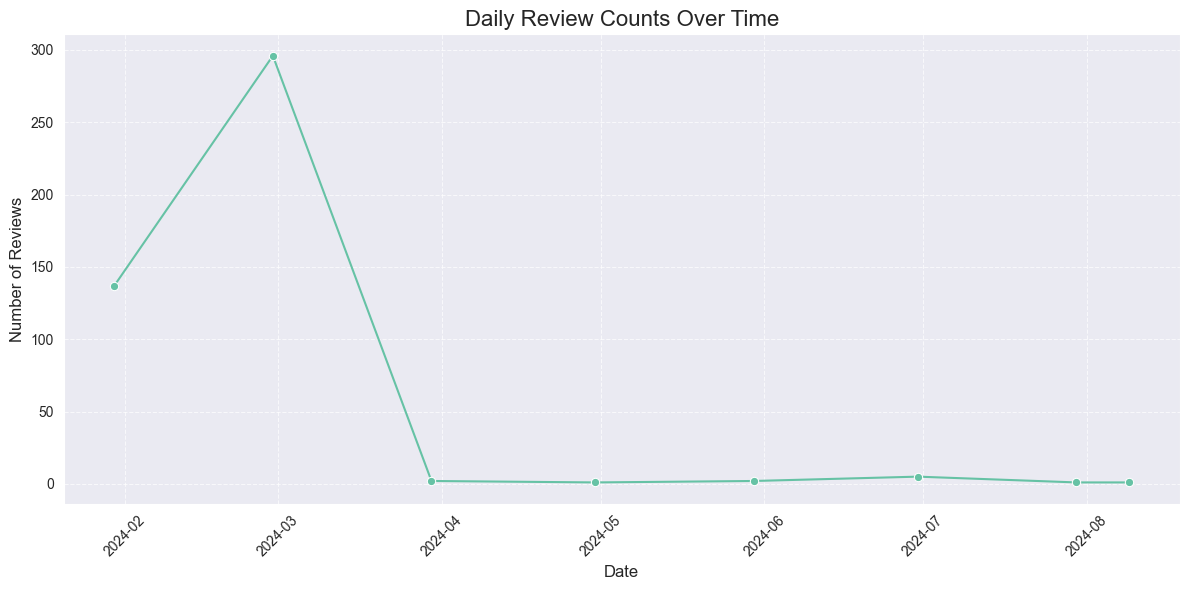

In [37]:
### Seaborn 연습 1

import seaborn as sns
import matplotlib.pyplot as plt

# 날짜 데이터를 datetime 객체로 변환
df['date'] = pd.to_datetime(df['date'])

# 날짜별로 데이터를 그룹화하고 리뷰 수를 계산
review_counts = df.groupby(df['date'].dt.date).size().reset_index(name='count')

# 그래프로 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=review_counts, x='date', y='count', marker='o')
plt.title('Daily Review Counts Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
df.groupby(df['date'].dt.date).size().reset_index(name='count')

,date,count
0,2024-01-30,137
1,2024-02-29,296
2,2024-03-30,2
3,2024-04-30,1
4,2024-05-30,2
5,2024-06-30,5
6,2024-07-30,1
7,2024-08-09,1


In [44]:
df.groupby(df['date'].dt.date).size()

date
2024-01-30    137
2024-02-29    296
2024-03-30      2
2024-04-30      1
2024-05-30      2
2024-06-30      5
2024-07-30      1
2024-08-09      1
dtype: int64

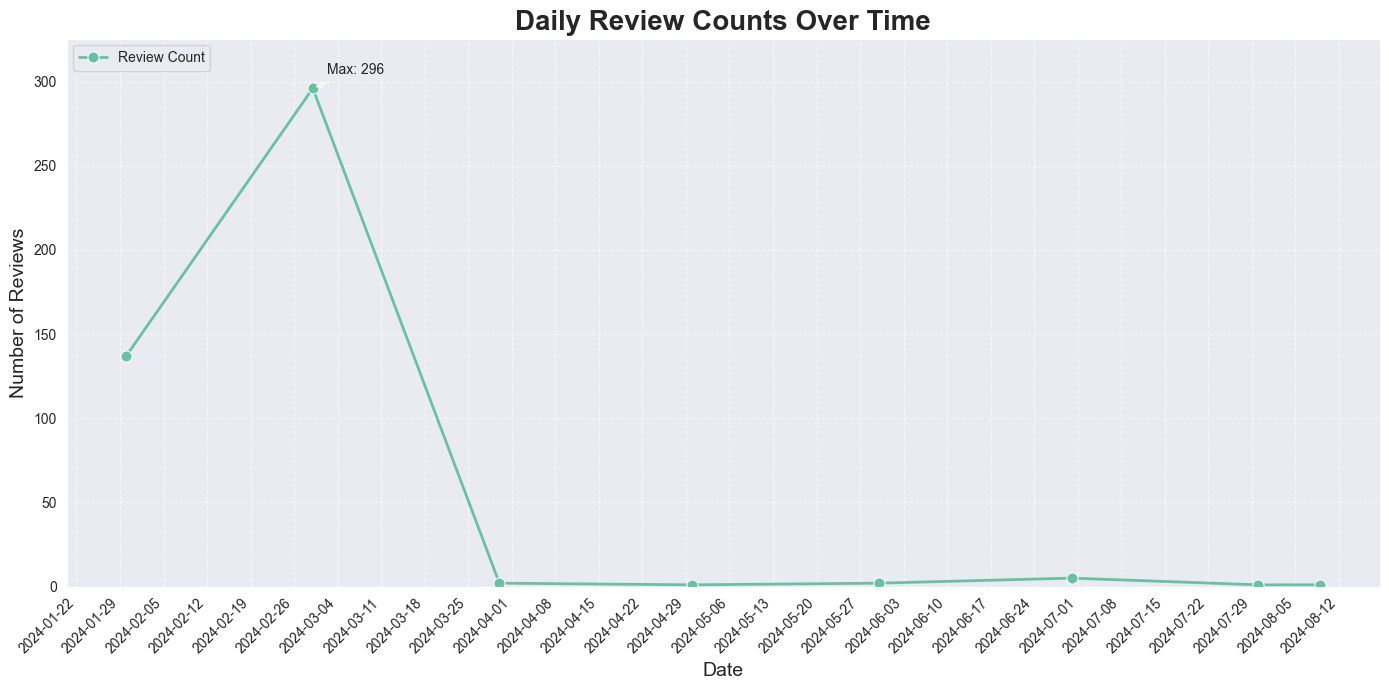

In [24]:
### Seaborn 연습 2

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 날짜 데이터를 datetime 객체로 변환
df['date'] = pd.to_datetime(df['date'])

# 날짜별로 데이터를 그룹화하고 리뷰 수를 계산
review_counts = df.groupby(df['date'].dt.date).size().reset_index(name='count')

# Seaborn 스타일 설정
sns.set_style("darkgrid")
sns.set_palette("Set2")

# 그래프로 시각화
plt.figure(figsize=(14, 7))
ax = sns.lineplot(data=review_counts, x='date', y='count', marker='o', 
                  linewidth=2, markersize=8)

# 제목 및 레이블 설정
plt.title('Daily Review Counts Over Time', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)

# x축 날짜 포맷 설정
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# y축 범위 설정
plt.ylim(0, review_counts['count'].max() * 1.1)

# 그리드 설정
plt.grid(True, linestyle='--', alpha=0.7)

# 주석 추가
max_count_date = review_counts.loc[review_counts['count'].idxmax(), 'date']
max_count = review_counts['count'].max()
plt.annotate(f'Max: {max_count}', xy=(max_count_date, max_count), 
             xytext=(10, 10), textcoords='offset points', 
             arrowprops=dict(arrowstyle='->'))

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')

# 범례 추가
plt.legend(['Review Count'], loc='upper left')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

## Huggingface Pipleline 으로 감성 분석

In [47]:
from transformers import pipeline
sentiment_pipeline = pipeline(model="dudcjs2779/sentiment-analysis-with-klue-bert-base")
data = ["너무 좋아요", "조금 아쉬웠어요", "좋은지 나쁜지 모르겠어요", "최악이에요", "최고에요"]
sentiment_pipeline(data)

[{'label': 'LABEL_1', 'score': 0.9777422547340393},
 {'label': 'LABEL_2', 'score': 0.5432389378547668},
 {'label': 'LABEL_0', 'score': 0.5509180426597595},
 {'label': 'LABEL_2', 'score': 0.9763167500495911},
 {'label': 'LABEL_1', 'score': 0.9642011523246765}]

In [48]:
df['comment'].str.len().describe()

count     444.000000
mean       63.144144
std        93.198746
min         3.000000
25%        23.000000
50%        39.000000
75%        65.000000
max      1430.000000
Name: comment, dtype: float64

In [49]:
df[df['comment'].str.len() < 10]

,author,comment,date
119,@user-kn1iq3up9w,광고가 참좋네요,2024-01-30 15:35:36
327,@user-yw3qc3kr1w,좋아요..삼성최고,2024-02-29 15:35:36
343,@user-xf3wn7ml7u,영상잘보았습니다,2024-02-29 15:35:36
364,@user-kr5ne2do7m,기능이 기대되요!,2024-02-29 15:35:36
370,@sinang1204,좋아요,2024-02-29 15:35:36
379,@user-eh1cj6bq3e,진짜 대단하네요,2024-02-29 15:35:36
391,@leech3313,참여하고가용 ^^,2024-01-30 15:35:36
409,@user-gt3tk5ou6h,세상너무좋네여,2024-02-29 15:35:36
410,@user-tc9lf8co6t,미래 AI시대,2024-01-30 15:35:36
414,@user-wk8hi4hf2y,좋네요,2024-01-30 15:35:36


In [50]:
# 리뷰에 대한 감정 분석 결과를 긍정, 부정으로 예측 
def analyze_sentiment_classification(review):
    """
    리뷰에 대한 감정 분석 결과를 중립(LABEL_0), 긍정(LABEL_1), 부정(LABEL_2)로 분류
    Args:
        review: 리뷰 텍스트
    Returns:
        float: 감정 분석 결과
    """
    sentiment_pipeline = pipeline(model="dudcjs2779/sentiment-analysis-with-klue-bert-base")
    sentiment = sentiment_pipeline([str(review)[:100]])[0]
    
    return sentiment['label']

# 함수 실행
sentiment_labels = analyze_sentiment_classification(data[0])
sentiment_labels

'LABEL_1'

In [51]:
data[0]

'너무 좋아요'

In [52]:
df['comment'].head()

0     채널 구독 EVENT \r\n\r\nAI의 능력을 모두의 능력으로 만드는 기업 하...
1    삼성SDS의 생성형 AI 서비스가 오피스와 우리의 라이프에 어떤 새바람을 일으킬지\...
2    삼성SDS의 지금까지 집약한 AI 기술과 고객 업종에 대한 깊은 이해를 바탕으로 기...
3    AI의 능력을 모두의 능력으로 만드는 기업 하이퍼오토메이션 엑셀레이터 \r\n삼성S...
4    삼성SDS만의 생성형 AI 서비스가 너무나 기대되고 AI 시대를 선도할 앞으로의 \...
Name: comment, dtype: object

In [53]:
# HTML 태그 제거
df['comment'] = df['comment'].str.replace('[^A-Za-z0-9가-힣ㄱ-ㅎ\ ]', '', regex=True)
df['comment'].head()

0     채널 구독 EVENT AI의 능력을 모두의 능력으로 만드는 기업 하이퍼오토메이션 ...
1    삼성SDS의 생성형 AI 서비스가 오피스와 우리의 라이프에 어떤 새바람을 일으킬지너...
2    삼성SDS의 지금까지 집약한 AI 기술과 고객 업종에 대한 깊은 이해를 바탕으로 기...
3    AI의 능력을 모두의 능력으로 만드는 기업 하이퍼오토메이션 엑셀레이터 삼성SDS  ...
4    삼성SDS만의 생성형 AI 서비스가 너무나 기대되고 AI 시대를 선도할 앞으로의 삼...
Name: comment, dtype: object

In [57]:
# 리뷰에 대한 감정 분석 결과를 데이터프레임에 추가
df['sentiment_class'] = df['comment'].apply(analyze_sentiment_classification)
# 감성 분석 결과가 포함된 데이터프레임을 CSV 파일로 저장
df.to_csv("youtube_reviews_classification.csv", index=False)
df.head()

,author,comment,date,sentiment_class
0,@SAMSUNGSDS,채널 구독 EVENT \r\n\r\nAI의 능력을 모두의 능력으로 만드는 기업 하...,2024-01-30 15:35:36,LABEL_1
1,@user-pw3gk2vn5e,삼성SDS의 생성형 AI 서비스가 오피스와 우리의 라이프에 어떤 새바람을 일으킬지\...,2024-02-29 15:35:36,LABEL_1
2,@fornest-3,삼성SDS의 지금까지 집약한 AI 기술과 고객 업종에 대한 깊은 이해를 바탕으로 기...,2024-01-30 15:35:36,LABEL_1
3,@user-li3hn3lw6q,AI의 능력을 모두의 능력으로 만드는 기업 하이퍼오토메이션 엑셀레이터 \r\n삼성S...,2024-02-29 15:35:36,LABEL_1
4,@user-bz9fd3rw1k,삼성SDS만의 생성형 AI 서비스가 너무나 기대되고 AI 시대를 선도할 앞으로의 \...,2024-02-29 15:35:36,LABEL_0


In [58]:
# df.to_csv("youtube_reviews_classification.csv", index=False)
df = pd.read_csv("youtube_reviews_classification.csv")
df.head()

,author,comment,date,sentiment_class
0,@SAMSUNGSDS,채널 구독 EVENT \r\n\r\nAI의 능력을 모두의 능력으로 만드는 기업 하...,2024-01-30 15:35:36,LABEL_1
1,@user-pw3gk2vn5e,삼성SDS의 생성형 AI 서비스가 오피스와 우리의 라이프에 어떤 새바람을 일으킬지\...,2024-02-29 15:35:36,LABEL_1
2,@fornest-3,삼성SDS의 지금까지 집약한 AI 기술과 고객 업종에 대한 깊은 이해를 바탕으로 기...,2024-01-30 15:35:36,LABEL_1
3,@user-li3hn3lw6q,AI의 능력을 모두의 능력으로 만드는 기업 하이퍼오토메이션 엑셀레이터 \r\n삼성S...,2024-02-29 15:35:36,LABEL_1
4,@user-bz9fd3rw1k,삼성SDS만의 생성형 AI 서비스가 너무나 기대되고 AI 시대를 선도할 앞으로의 \...,2024-02-29 15:35:36,LABEL_0


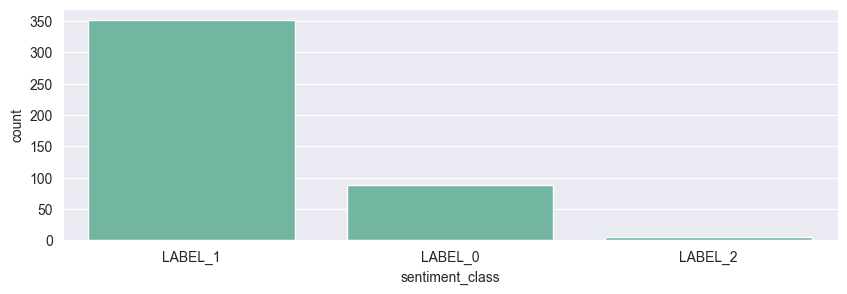

In [59]:
# 감성 분석 결과를 막대 그래프로 비교
plt.figure(figsize=(10, 3))
sns.countplot(x='sentiment_class', data=df)
plt.show()

In [60]:
# 부정 감성을 갖고 있는 데이터를 확인 
df[df['sentiment_class']=="LABEL_2"]

,author,comment,date,sentiment_class
130,@soda2023,"삼성SDS의 생성형 AI와 함께 이제 오피스라이프도\r\n뻔해지고, 별걸 다 물어보...",2024-02-29 15:35:36,LABEL_2
135,@user-oo1kq9hk5m,AI시대가 오고 있네요~~\n세상이 너무 빨리 변화되어\n정신이 없습니다.,2024-01-30 15:35:36,LABEL_2
297,@rounlee4873,정교한 필터링으로 정말 너무나 많은 부정확하고 도움 안 되는 인터넷 세상에서 필요한...,2024-02-29 15:35:36,LABEL_2
436,@user-rl9ns5qb4o,광고에 나온 해줘! 해줘! 하는 분들 별로 하는 일 없어보이는데 곧 짤리겠죠? ㅋㅋ,2024-02-29 15:35:36,LABEL_2
444,@i8071625,싱기하다..,2024-01-30 15:35:36,LABEL_2


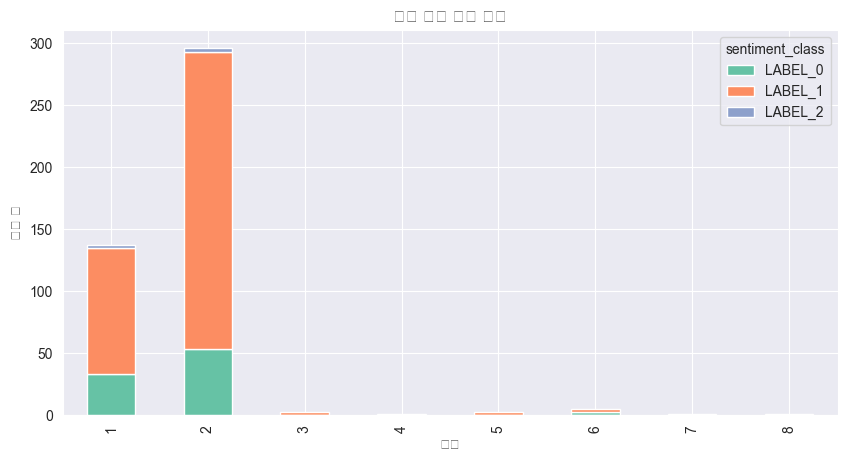

In [61]:
### 시간의 변화에 따른 감성 분석 변화

# 'date' 열을 datetime 형태로 변환
df['date'] = pd.to_datetime(df['date'])

# 월별로 감성 클래스의 빈도 계산
df['month'] = df['date'].dt.month  
grouped_data = df.groupby(['month', 'sentiment_class']).size().reset_index(name='counts')

# Pivot Table 생성
pivot_data = grouped_data.pivot(index='month', columns='sentiment_class', values='counts').fillna(0)

# 시각화
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('월별 감성 분석 결과')
plt.xlabel('날짜')
plt.ylabel('리뷰 수')
plt.show()

## 랭체인을 활용한 LLM 감성분석 (분류)

In [62]:
## Few-shot: 예시를 들어줌

from langchain_core.prompts.few_shot import FewShotPromptTemplate
from langchain_core.prompts.prompt import PromptTemplate

# 리뷰 예시와 해당 리뷰의 감성(긍정, 부정, 중립)을 정의
examples = [
    {
        "review": "매우 유익했습니다!",
        "sentiment": "긍정",
    },
    {
        "review": "매우 실망스러웠어요.",
        "sentiment": "부정",
    },
    {
        "review": "만족스러웠습니다.",
        "sentiment": "긍정",
    },
    {
        "review": "사용이 간편해서 좋았습니다.",
        "sentiment": "긍정",
    },
    {
        "review": "내용이 조금 지루했지만, 정보는 유용했습니다.",
        "sentiment": "중립",
    },
    {
        "review": "예상보다 참석자가 많아서 질문을 충분히 하지 못했습니다.",
        "sentiment": "부정",
    },
]


# Few-shot 학습을 위한 템플릿 정의
example_prompt = PromptTemplate(
    input_variables=["review", "sentiment"], template="review: {review}\n{sentiment}"
)

print(example_prompt.format(**examples[0]))

review: 매우 유익했습니다!
긍정


In [63]:
prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    suffix="review: {input}",
    input_variables=["input"],
)

# 새 리뷰에 대한 감성 분석 예제 생성
new_review = "이벤트 내용은 좋은데 기간이 너무 짧았어요."
print(prompt.format(input=new_review))

review: 매우 유익했습니다!
긍정

review: 매우 실망스러웠어요.
부정

review: 만족스러웠습니다.
긍정

review: 사용이 간편해서 좋았습니다.
긍정

review: 내용이 조금 지루했지만, 정보는 유용했습니다.
중립

review: 예상보다 참석자가 많아서 질문을 충분히 하지 못했습니다.
부정

review: 이벤트 내용은 좋은데 기간이 너무 짧았어요.


In [66]:
# LLM
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0125",
                 api_key=OPENAI_API_KEY)

chain = prompt | llm

response = chain.invoke(new_review)

response

AIMessage(content='부정', response_metadata={'token_usage': {'completion_tokens': 2, 'prompt_tokens': 175, 'total_tokens': 177}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-a55c7b1e-8413-4df3-a489-4d3ba7ebdaf6-0')

In [67]:
sentiment = response.content
sentiment

'부정'

In [68]:
# 5개의 샘플 데이터
test_df = df.head()
test_df

,author,comment,date,sentiment_class,month
0,@SAMSUNGSDS,채널 구독 EVENT \r\n\r\nAI의 능력을 모두의 능력으로 만드는 기업 하...,2024-01-30 15:35:36,LABEL_1,1
1,@user-pw3gk2vn5e,삼성SDS의 생성형 AI 서비스가 오피스와 우리의 라이프에 어떤 새바람을 일으킬지\...,2024-02-29 15:35:36,LABEL_1,2
2,@fornest-3,삼성SDS의 지금까지 집약한 AI 기술과 고객 업종에 대한 깊은 이해를 바탕으로 기...,2024-01-30 15:35:36,LABEL_1,1
3,@user-li3hn3lw6q,AI의 능력을 모두의 능력으로 만드는 기업 하이퍼오토메이션 엑셀레이터 \r\n삼성S...,2024-02-29 15:35:36,LABEL_1,2
4,@user-bz9fd3rw1k,삼성SDS만의 생성형 AI 서비스가 너무나 기대되고 AI 시대를 선도할 앞으로의 \...,2024-02-29 15:35:36,LABEL_0,2


In [69]:
# 모든 리뷰에 대해서 감성 분석을 적용해서 새로운 열에 추가하는 함수
def analyze_sentiment_llm(review):
    response = chain.invoke(review)
    return response.content

test_df['sentiment_llm'] = test_df['comment'].apply(analyze_sentiment_llm)
test_df

,author,comment,date,sentiment_class,month,sentiment_llm
0,@SAMSUNGSDS,채널 구독 EVENT \r\n\r\nAI의 능력을 모두의 능력으로 만드는 기업 하...,2024-01-30 15:35:36,LABEL_1,1,홍보 내용이 포함된 리뷰이므로 중립적인 의견을 제공하기 어렵습니다.
1,@user-pw3gk2vn5e,삼성SDS의 생성형 AI 서비스가 오피스와 우리의 라이프에 어떤 새바람을 일으킬지\...,2024-02-29 15:35:36,LABEL_1,2,긍정
2,@fornest-3,삼성SDS의 지금까지 집약한 AI 기술과 고객 업종에 대한 깊은 이해를 바탕으로 기...,2024-01-30 15:35:36,LABEL_1,1,긍정
3,@user-li3hn3lw6q,AI의 능력을 모두의 능력으로 만드는 기업 하이퍼오토메이션 엑셀레이터 \r\n삼성S...,2024-02-29 15:35:36,LABEL_1,2,긍정
4,@user-bz9fd3rw1k,삼성SDS만의 생성형 AI 서비스가 너무나 기대되고 AI 시대를 선도할 앞으로의 \...,2024-02-29 15:35:36,LABEL_0,2,긍정


## 랭체인을 활용한 LLM 감성분석 (평점 예측)

In [70]:
from langchain_core.prompts.prompt import PromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser


llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0125",
                 api_key=OPENAI_API_KEY)


template = """
Classify the given sentiment of the given text into positive or negative classes and provide a relevant score.
The sentiment score should be between 0.0 and 1.0, where 0.0 indicates a negative sentiment and 1.0 indicates a positive sentiment.

Input: {input}

Output: sentiment_label (Score: sentiment_score)
"""

prompt = PromptTemplate.from_template(template)
output_parser = StrOutputParser()

# LCEL chaining
chain = prompt | llm | output_parser

# chain 호출
response = chain.invoke({"input": "최고예요"})

# 결과 확인
response

'Positive (Score: 1.0)'

In [71]:
re.search(r"\d+\.\d+", response).group()

'1.0'

In [72]:
# 감정 분석 결과를 반환하는 함수 정의
def analyze_sentiment_score_llm(review):
    """
    리뷰에 대한 감정 분석 결과를 0~1 사이의 값으로 변환하는 함수
    Args:
        review: 리뷰 텍스트
    Returns:
        float: 감정 분석 결과
    """
    template = """
    Classify the given sentiment of the given text into positive or negative classes and provide a relevant score.
    The sentiment score should be between 0.0 and 1.0, where 0.0 indicates a negative sentiment and 1.0 indicates a positive sentiment.

    Input: {input}

    Output: sentiment_label (Score: sentiment_score)
    """

    prompt = PromptTemplate.from_template(template)
    output_parser = StrOutputParser()

    llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0125",
                     api_key=OPENAI_API_KEY)

    chain = prompt | llm | output_parser

    response = chain.invoke({"input": review})
    
    sentiment_score = re.search(r"\d+\.\d+", response).group()
    
    return sentiment_score


# 함수 실행
sentiment_score = analyze_sentiment_score_llm("최고예요")
sentiment_score

'1.0'

In [73]:
# 함수 실행
sentiment_score = analyze_sentiment_score_llm("별로예요")
sentiment_score

'0.2'

In [74]:
# 함수 실행
sentiment_score = analyze_sentiment_score_llm("보통 수준이에요")
sentiment_score

'0.3'

In [75]:
test_df['sentiment_llm_socre'] = test_df['comment'].apply(analyze_sentiment_score_llm)
test_df

,author,comment,date,sentiment_class,month,sentiment_llm,sentiment_llm_socre
0,@SAMSUNGSDS,채널 구독 EVENT \r\n\r\nAI의 능력을 모두의 능력으로 만드는 기업 하...,2024-01-30 15:35:36,LABEL_1,1,홍보 내용이 포함된 리뷰이므로 중립적인 의견을 제공하기 어렵습니다.,0.9
1,@user-pw3gk2vn5e,삼성SDS의 생성형 AI 서비스가 오피스와 우리의 라이프에 어떤 새바람을 일으킬지\...,2024-02-29 15:35:36,LABEL_1,2,긍정,0.95
2,@fornest-3,삼성SDS의 지금까지 집약한 AI 기술과 고객 업종에 대한 깊은 이해를 바탕으로 기...,2024-01-30 15:35:36,LABEL_1,1,긍정,1.0
3,@user-li3hn3lw6q,AI의 능력을 모두의 능력으로 만드는 기업 하이퍼오토메이션 엑셀레이터 \r\n삼성S...,2024-02-29 15:35:36,LABEL_1,2,긍정,0.9
4,@user-bz9fd3rw1k,삼성SDS만의 생성형 AI 서비스가 너무나 기대되고 AI 시대를 선도할 앞으로의 \...,2024-02-29 15:35:36,LABEL_0,2,긍정,0.9
